In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$|| \hat beta - \beta_0 || = p \sigma^2$$

$$ || \hat \beta^{ridge} || = p \sigma^2 (1-\lambda)^{-2} + \lambda^2 (1-\lambda)^{-2} \beta^t \beta $$


In [2]:
k= 10
n = 1000

#1  =  1/(1+x)^2 + m*x^2/(1+x)^2 solve for x
#http://www.few.vu.nl/~wvanwie/Courses/HighdimensionalDataAnalysis/WNvanWieringen_HDDA_Lecture234_RidgeRegression_20182019.pdf

m = 5
alpha = 1/12 #?
#alpha = k/m? minimizes?

X = np.random.normal(size=(n,k))
E = np.random.normal(size=(n,1))
Y = m*X.sum(axis=1).reshape(n,1) + E

X0 = np.random.normal(size=(n,k))
E0 = np.random.normal(size=(n,1))
Y0 = m*X0.sum(axis=1).reshape(n,1) + E0

In [3]:
XX = (X.T).dot(X)
beta = np.linalg.inv( XX ).dot( X.T ).dot(Y)
Px0 = X0.dot( np.linalg.inv( XX  ) ).dot( X0.T )


#MSE in sample of ols predictor?
E_hat0 = Y0 - X0.dot(beta)
print(   E_hat0.T.dot(E_hat0)[0]/n )

#risk? of ols
risk = X0.sum(axis=1).reshape(n,1) - X0.dot(beta)
print( risk.T.dot(risk)[0]/n )

#theoretical risk?
print(np.trace(Px0)/n)

[1.09633047]
[155.95776203]
0.009666952031291684


In [4]:
XX = (X.T).dot(X)
beta = np.linalg.inv( XX  + alpha*np.identity(k) ).dot( X.T ).dot(Y)
Px0 = X0.dot( np.linalg.inv( XX  + alpha*np.identity(k) ) ).dot( X0.T )


#MSE in sample of ols predictor?
E_hat0 = Y0 - X0.dot(beta)
print(   E_hat0.T.dot(E_hat0)[0]/n )

#risk? of ols
risk = X0.sum(axis=1).reshape(n,1) - X0.dot(beta)
print( risk.T.dot(risk)[0]/n )

#theoretical risk?
print(np.trace(Px0)/n)

[1.09652897]
[155.92278996]
0.009666144236703018


10 1000 0.08333333333333333


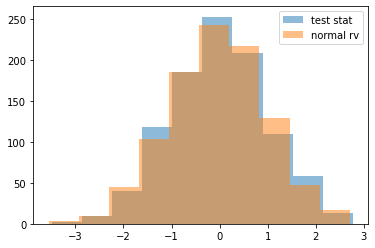

1.0031488485068933
0.008477550276502772


In [13]:
def standardize(array):
    """divide by variance, multiple by sqrt(n)"""
    array = np.array(array)
    return np.sqrt(len(array))*array.mean()/array.std()


def monte_carlo(n_trials=1000,k= 10,n = 1000, m = 5, alpha = 1/12):
    print(k,n,alpha)
    n_trials = 1000
    mses = []
    for i in range(n_trials):
        #split sample for model 1
        X = np.random.normal(size=(n,k))
        E = np.random.normal(size=(n,1))
        Y = m*X.sum(axis=1).reshape(n,1) + E


        XX = (X.T).dot(X)
        beta = np.linalg.inv( XX ).dot( X.T ).dot(Y)

        E_hat = Y - X.dot(beta)
        mse = E_hat**2

        #model 2
        X0 = np.random.normal(size=(n,k))
        E0 = np.random.normal(size=(n,1))
        Y0 = m*X0.sum(axis=1).reshape(n,1) + E0

        XX0 = (X0.T).dot(X0)
        beta_r = np.linalg.inv( XX0  + alpha*np.identity(k) ).dot( X0.T ).dot(Y0)

        E_hat_r = Y0 - X0.dot(beta_r)
        mse_r = E_hat_r**2 #fit on the alternate set?

        mses.append( standardize(mse_r - mse) )
    return np.array(mses)

#under null hypothesis
mses= monte_carlo()
plt.hist(mses,alpha=.5,label='test stat')
x = np.random.normal(size=1000)
plt.hist(x,alpha=.5,label='normal rv')
plt.savefig('null_lasso.png',dpi=300)
plt.legend()
plt.show()
print(mses.var())
print(mses.mean())

10 100 5
0.6640493656448342
2.540679545896894
15 150 7.5
0.5561217898308823
4.019984087029021
20 200 10
0.5810054963788197
5.384788018889749


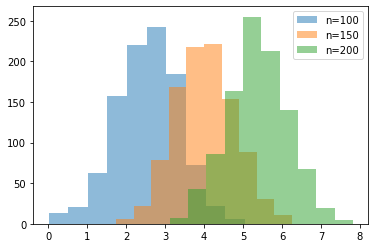

In [14]:
#consistency... start with small sample

for i in [1,1.5,2]:
    mses = monte_carlo(k= int(10*i), n = int(100*i), alpha = 5*i)
    plt.hist(mses,alpha=.5,label='n=' + str( int(i*100) ) )
    print(mses.var())
    print(mses.mean())
plt.legend()
plt.savefig('consist_lass.png',dpi=300)
plt.show()
